In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
base_dir='/gdrive/My Drive/Machine Learning/data/train/train'

In [0]:
classes = ['right', 'forward', 'left']

In [0]:
import shutil
import glob

In [0]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

right: 72 Images
forward: 149 Images
left: 126 Images


In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
BATCH_SIZE = 30
IMG_SHAPE = 150

In [0]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    zoom_range =[0.75,1.25],
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE,
                                                    directory = train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
                                                    class_mode='binary')

Found 278 images belonging to 3 classes.


In [0]:
image_gen_val = ImageDataGenerator(rescale = 1./255) 

val_data_gen =image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary'
                                               ) 

Found 69 images belonging to 3 classes.


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE,3), strides = 2, padding ='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu',strides = 2, padding ='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu',strides = 2, padding ='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_1 = os.path.join(train_dir, 'left') 
train_2= os.path.join(train_dir, 'right')
train_3 = os.path.join(train_dir, 'forward')

val_1 = os.path.join(val_dir, 'left') 
val_2 = os.path.join(val_dir, 'right')
val_3 = os.path.join(val_dir, 'forward')

total_train = len(os.listdir(train_1)) + len(os.listdir(train_2)) + len(os.listdir(train_3)) 

total_val = len(os.listdir(val_1)) + len(os.listdir(val_2)) + len(os.listdir(val_3)) 

In [0]:
epochs=20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

#instead of total_train and total_val
#we can use train.data_gen.n and val_data_gen.n

Epoch 1/20
10/10 [==============================] - 135s 14s/step - loss: 1.0641 - acc: 0.4029 - val_loss: 1.0946 - val_acc: 0.4348
Epoch 2/20
10/10 [==============================] - 1s 73ms/step - loss: 1.0723 - acc: 0.4137 - val_loss: 1.0732 - val_acc: 0.4203
Epoch 3/20
10/10 [==============================] - 3s 295ms/step - loss: 1.0684 - acc: 0.4317 - val_loss: 1.0679 - val_acc: 0.4203
Epoch 4/20
10/10 [==============================] - 3s 295ms/step - loss: 1.0677 - acc: 0.4604 - val_loss: 1.0770 - val_acc: 0.4348
Epoch 5/20
10/10 [==============================] - 3s 289ms/step - loss: 1.0520 - acc: 0.4496 - val_loss: 1.0746 - val_acc: 0.4203
Epoch 6/20
10/10 [==============================] - 3s 289ms/step - loss: 1.0323 - acc: 0.4964 - val_loss: 1.0847 - val_acc: 0.4348
Epoch 7/20
10/10 [==============================] - 3s 286ms/step - loss: 1.0010 - acc: 0.4784 - val_loss: 1.0541 - val_acc: 0.4348
Epoch 8/20
10/10 [==============================] - 3s 301ms/step - loss: 1.0

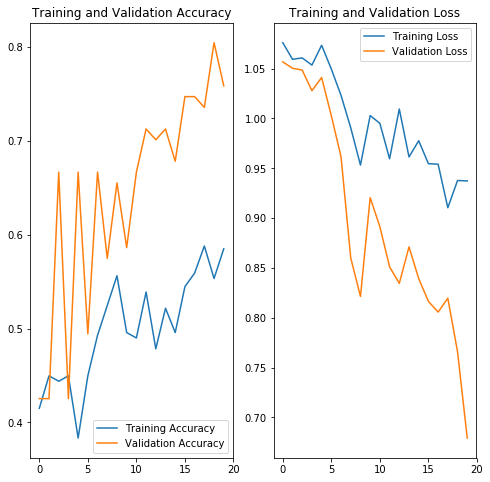

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
model.save('model.h10')

KeyboardInterrupt: ignored

array([0.9800582 , 0.01141267, 0.00852915], dtype=float32)

(array([[[[0.3529412 , 0.3921569 , 0.36078432],
          [0.34901962, 0.38823533, 0.35686275],
          [0.35686275, 0.39607847, 0.3647059 ],
          ...,
          [0.        , 0.03137255, 0.        ],
          [0.00784314, 0.03137255, 0.01568628],
          [0.        , 0.03529412, 0.01568628]],
 
         [[0.3529412 , 0.3921569 , 0.36078432],
          [0.34901962, 0.38823533, 0.35686275],
          [0.34901962, 0.38823533, 0.35686275],
          ...,
          [0.        , 0.02745098, 0.        ],
          [0.00392157, 0.03137255, 0.00392157],
          [0.        , 0.01960784, 0.00392157]],
 
         [[0.35686275, 0.3803922 , 0.3647059 ],
          [0.35686275, 0.38431376, 0.35686275],
          [0.3647059 , 0.3921569 , 0.3647059 ],
          ...,
          [0.00392157, 0.03137255, 0.00392157],
          [0.00392157, 0.03137255, 0.00392157],
          [0.        , 0.01568628, 0.        ]],
 
         ...,
 
         [[0.4901961 , 0.5294118 , 0.49411768],
          [0.50196